In [1]:
import pandas as pd
import scipy.stats as stats
df_fraud = pd.read_csv('../../datasets/credit_card_fraud_dataset.csv')
df_fraud.head(3)

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0


In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl # 한글 폰트 설정 (NanumGothic) 
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
import seaborn as sns

In [3]:
import datetime

In [4]:
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TransactionID    100000 non-null  int64  
 1   TransactionDate  100000 non-null  object 
 2   Amount           100000 non-null  float64
 3   MerchantID       100000 non-null  int64  
 4   TransactionType  100000 non-null  object 
 5   Location         100000 non-null  object 
 6   IsFraud          100000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 5.3+ MB


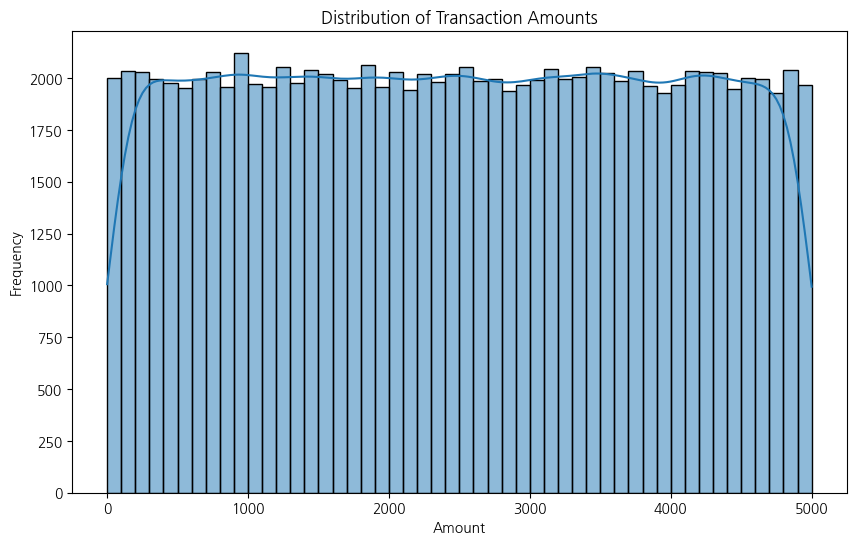

In [5]:
# 거래 금액 분포 시각화
plt.figure(figsize=(10, 6))
sns.histplot(df_fraud['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

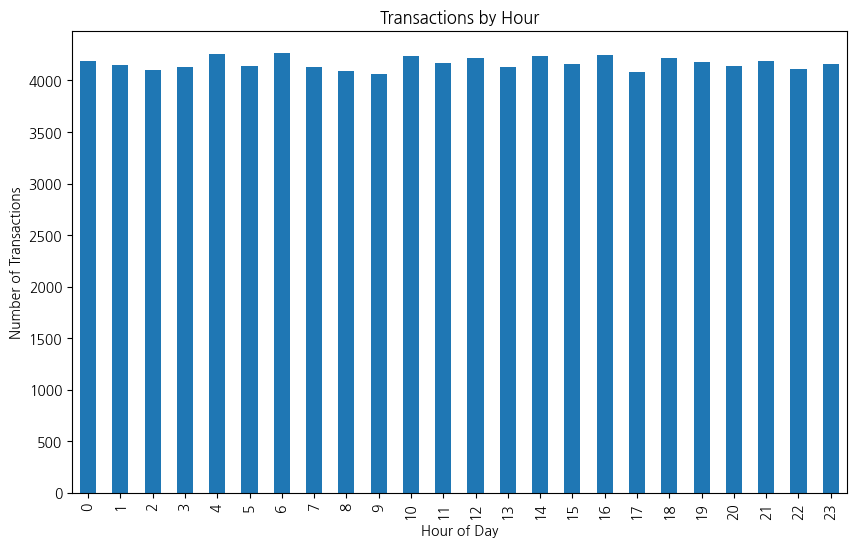

In [6]:
# 2. 시간대별 거래량 분석
df_fraud['TransactionDate'] = pd.to_datetime(df_fraud['TransactionDate'])  # 형식을 지정하지 않음
df_fraud['Hour'] = df_fraud['TransactionDate'].dt.hour
hourly_transactions = df_fraud.groupby('Hour').size()

plt.figure(figsize=(10, 6))
hourly_transactions.plot(kind='bar')
plt.title('Transactions by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.show()

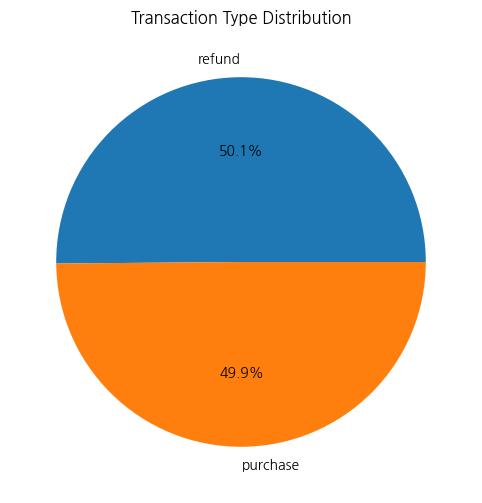

In [7]:
# 3. 거래 유형별 비율
transaction_type_counts = df_fraud['TransactionType'].value_counts()

plt.figure(figsize=(8, 6))
transaction_type_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Transaction Type Distribution')
plt.ylabel('')
plt.show()

In [8]:
# 4. 특정 지역에서의 거래 금액 평균
average_amount_by_location = df_fraud.groupby('Location')['Amount'].mean().sort_values(ascending=False)
average_amount_by_location

Location
Houston         2510.600224
Phoenix         2509.400378
San Jose        2505.569568
Chicago         2497.522896
Philadelphia    2496.504547
Los Angeles     2493.017409
Dallas          2492.671768
New York        2491.948727
San Diego       2489.408425
San Antonio     2484.659923
Name: Amount, dtype: float64

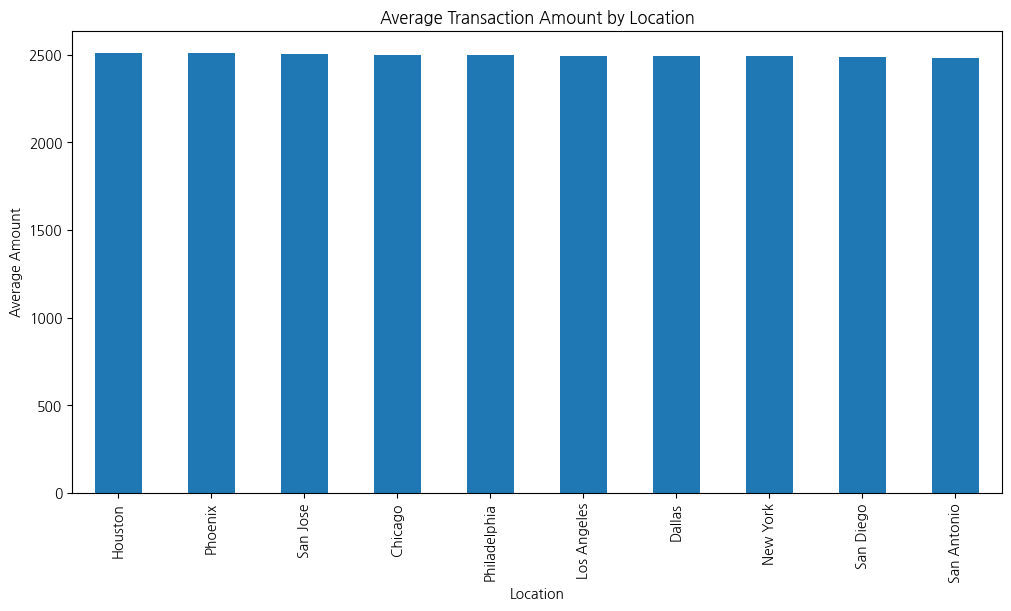

In [9]:
plt.figure(figsize=(12, 6))
average_amount_by_location.plot(kind='bar')
plt.title('Average Transaction Amount by Location')
plt.xlabel('Location')
plt.ylabel('Average Amount')
plt.show()

In [10]:
# 5. 이상치 탐지 (IQR 방법)
Q1 = df_fraud['Amount'].quantile(0.25)
Q3 = df_fraud['Amount'].quantile(0.75)
IQR = Q3 - Q1
outliers = df_fraud[(df_fraud['Amount'] < (Q1 - 1.5 * IQR)) | (df_fraud['Amount'] > (Q3 + 1.5 * IQR))]

In [11]:
print(f'Number of Outliers: {outliers.shape[0]}')

Number of Outliers: 0


In [ ]:
#